In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/content/Salesstore1.csv", sep="\t", error_bad_lines =  False)
df.shape

(730, 13)

In [12]:
df.head(20)

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box
5,41696,Not Specified,45,237.28,Express Air,-2088.68,Bryan Mills,Northwest Territories,Small Business,Office Supplies,Appliances,Hoover Portapower™ Portable Vacuum,Large Box
6,43267,Critical,17,1368.14,Express Air,171.26,Fred Wasserman,Northwest Territories,Home Office,Office Supplies,Appliances,Honeywell Enviracaire® Portable Air Cleaner fo...,Large Box
7,29319,Low,21,4429.69,Express Air,983.55,Filia McAdams,Atlantic,Small Business,Technology,Copiers and Fax,Canon PC-428 Personal Copier,Large Box
8,5988,Not Specified,40,19109.61,Express Air,-379.29,Sanjit Chand,West,Home Office,Technology,Copiers and Fax,Sharp AL-1530CS Digital Copier,Large Box
9,51073,Not Specified,17,2475.08,Express Air,958.80,Luke Weiss,West,Corporate,Furniture,Office Furnishings,"3M Polarizing Task Lamp with Clamp Arm, Light ...",Large Box


In [13]:
num_cols = df.columns
cont_cols = []
for i in num_cols:
  if(len(df[i].unique())) > int(df.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['Order_ID', 'Order_Quantity', 'Sales', 'Profit', 'Customer_Name', 'Product_Name']


##Categorical Features:
######1.Order_Priority
######2.Ship_Mode
######3.Region
######4.Customer_Segment
######5.Product_Category
######6.Product_Sub-Category
######7.Product_Container











##Continuous Features:
######1.Order_ID(Primary Key)
######2.Order_Quantity
######3.Sales
######4.Profit
######5.Customer_Name
######6.Product_Name











In [14]:
df["Sales"].describe()

count      730.000000
mean      1502.777653
std       2893.936648
min          8.600000
25%        171.098375
50%        438.700000
75%       1480.855000
max      27663.920000
Name: Sales, dtype: float64

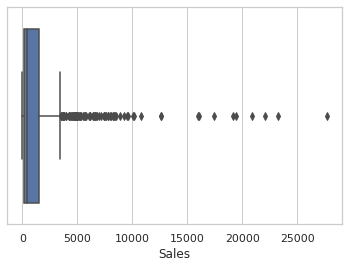

In [38]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Sales"])

###Inference:
#####Maximum Sales density lies between 8.600000 & 27663.920000
#####Median is at 438.700000
#####There also lie many outliers beyond the maximum mark.
---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


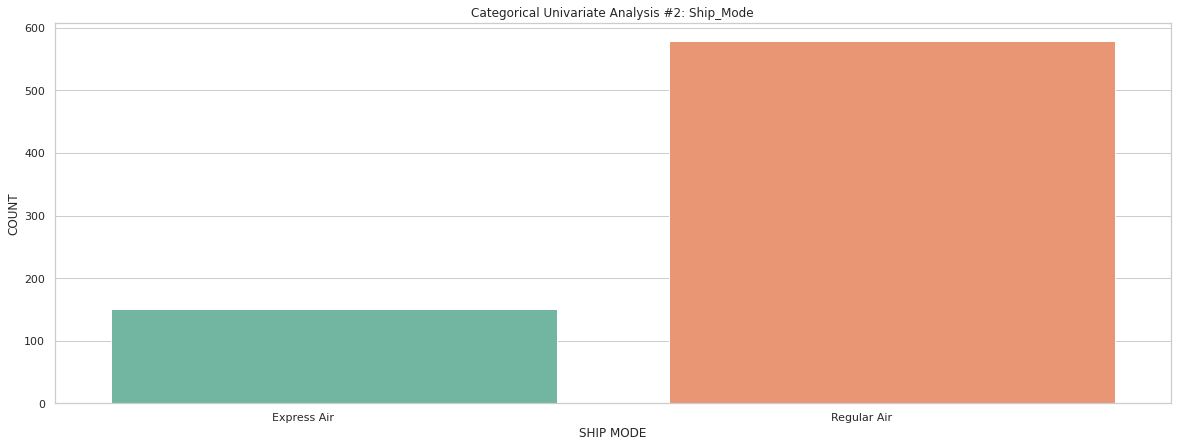

In [17]:
plt.figure(figsize=(20,7))
ax = sns.countplot(df['Ship_Mode'], palette="Set2")  
plt.xlabel('SHIP MODE')  
plt.ylabel('COUNT')
plt.title('Categorical Univariate Analysis #1: Ship_Mode')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.show()

###Inference:
#####Most of the shipments are shipped through Regular Air, while about a quarter of that is shiiped through Express Air as it must be more expensive.
---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


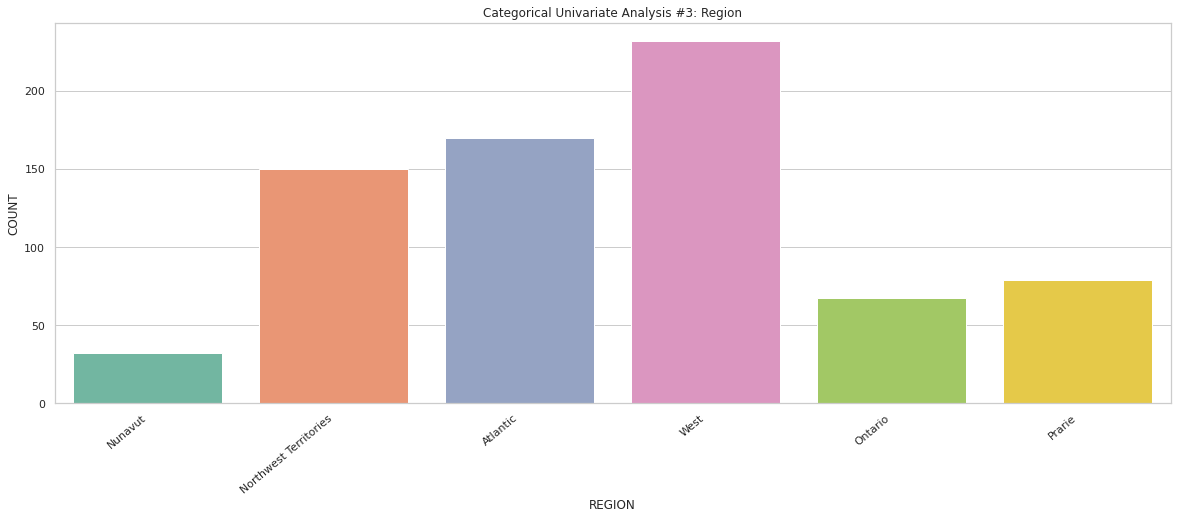

In [18]:
plt.figure(figsize=(20,7))
ax = sns.countplot(df['Region'], palette="Set2")  
plt.xlabel('REGION')  
plt.ylabel('COUNT')
plt.title('Categorical Univariate Analysis #2: Region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

###Inference:
#####The maximum number of orders come from the West Region.
#####The least number of orders come from Nunavut, so the Store needs to think about expanding their customer base over there.
---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


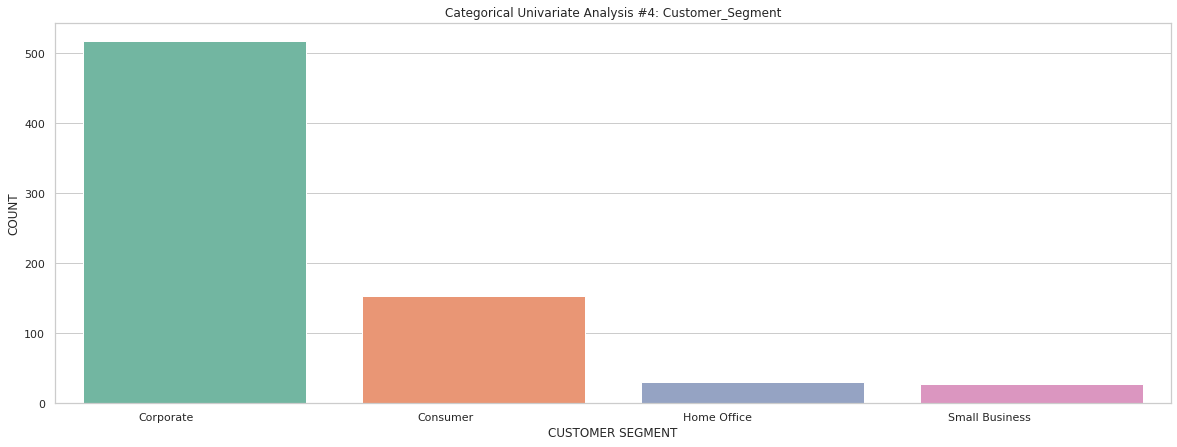

In [19]:
plt.figure(figsize=(20,7))
ax = sns.countplot(df['Customer_Segment'], palette="Set2")  
plt.xlabel('CUSTOMER SEGMENT')  
plt.ylabel('COUNT')
plt.title('Categorical Univariate Analysis #3: Customer_Segment')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.show()

###Inference:
#####The Home Office and Small Business customer segments are too small without any scope of significant growth. So, the Store needs to think about exploiting the Consumer Segment by increasing direct-to-consumer sales.
---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


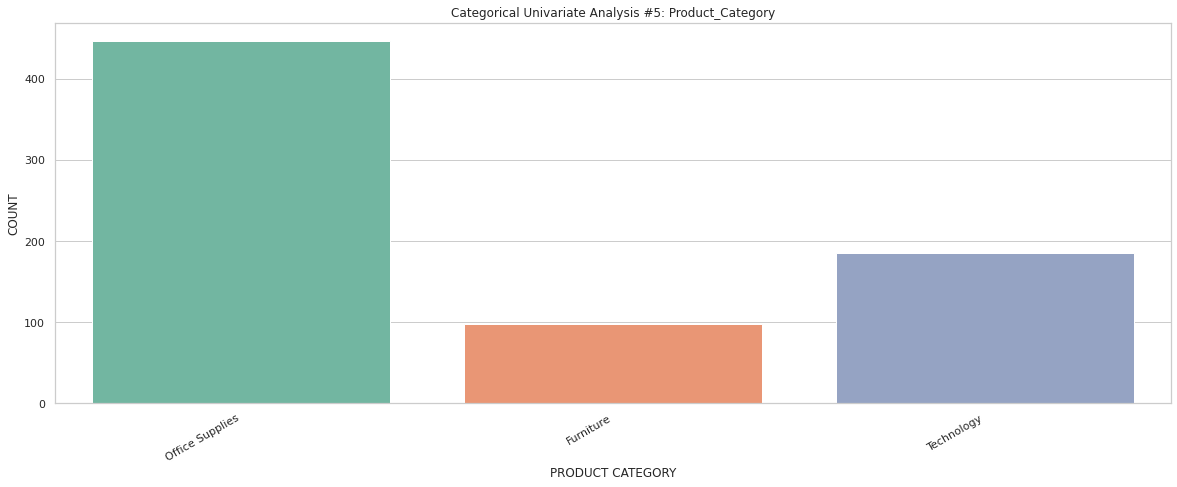

In [20]:
plt.figure(figsize=(20,7))
ax = sns.countplot(df['Product_Category'], palette="Set2")  
plt.xlabel('PRODUCT CATEGORY')  
plt.ylabel('COUNT')
plt.title('Categorical Univariate Analysis #4: Product_Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30,  ha="right")
plt.show()

###Inference:
#####Most of the orders are for Office Supplies, and the least for Furniture. The Store can work on increasing or decreasing these numbers for different catgories depending on their inventory.
---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


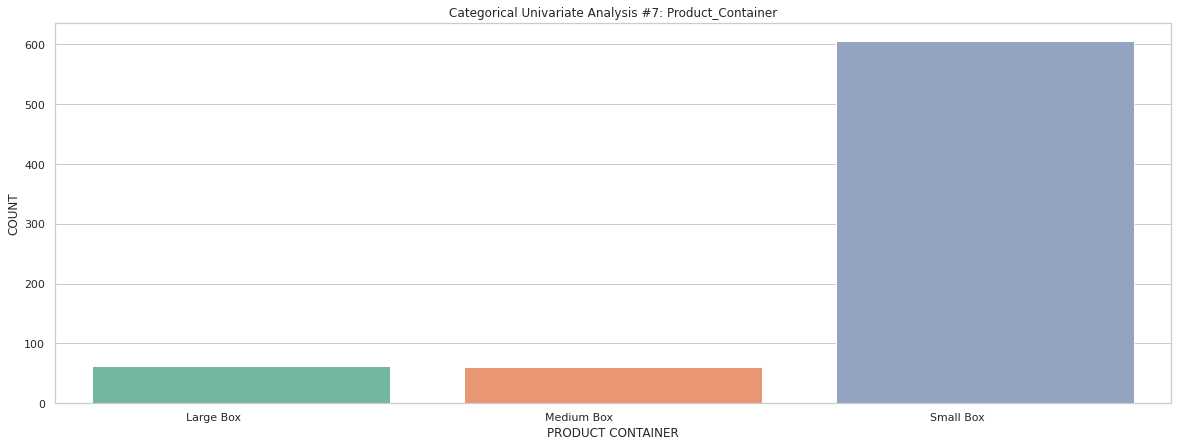

In [22]:
plt.figure(figsize=(20,7))
ax = sns.countplot(df['Product_Container'], palette="Set2")  
plt.xlabel('PRODUCT CONTAINER')  
plt.ylabel('COUNT')
plt.title('Categorical Univariate Analysis #5: Product_Container')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.show()

###Inference:
#####The store can use this information to stock up on Small Boxes as they are the most required, and not buy Large/Medium boxes in bulk.
---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


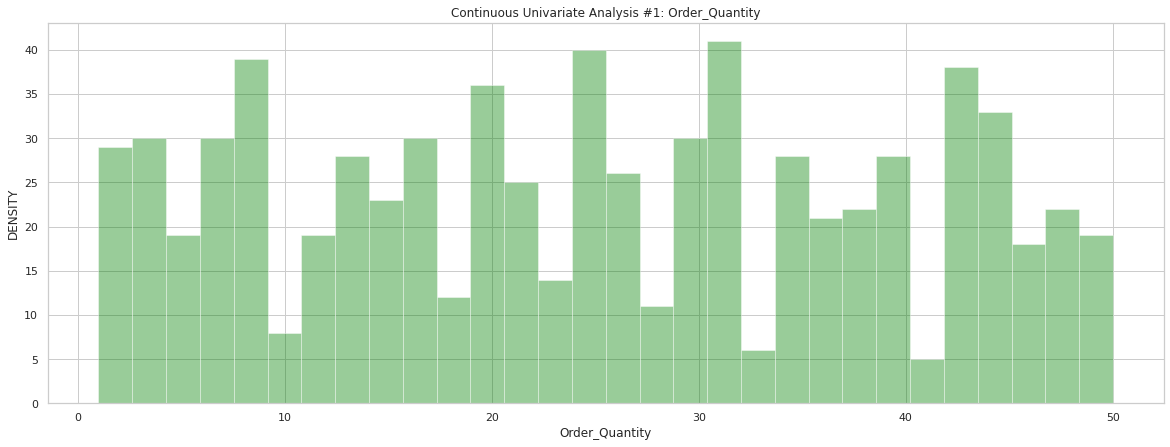

In [23]:
plt.figure(figsize=(20,7))
plt.xlabel("ORDER QUANTITY")  
plt.ylabel("DENSITY")  
plt.title("Continuous Univariate Analysis #1: Order_Quantity")
sns.distplot(df['Order_Quantity'], kde=False, color='green', bins=30)
plt.show()

###Inference:
#####Not much can be inferred from this graph.
---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


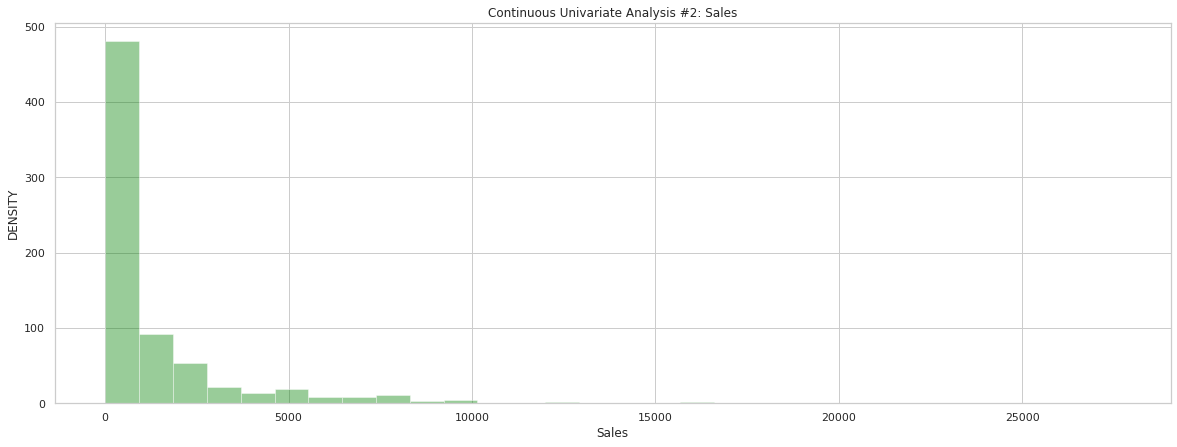

In [24]:
plt.figure(figsize=(20,7))
plt.xlabel("SALES")  
plt.ylabel("DENSITY")  
plt.title("Continuous Univariate Analysis #2: Sales")
sns.distplot(df['Sales'], kde=False, color='green', bins=30)
plt.show()

###Inference:
#####Most of the sales are small in nature, while huge sales are very few.
---



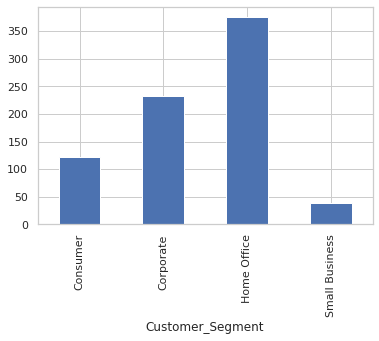

In [28]:
df.groupby('Customer_Segment')['Profit'].mean().plot.bar()

###Inference:
#####The major chunk of profits comes from the customer segment of Home office even though the number of their sales is not too high(from previously mentioned graphs).
#####The least profitable customer segment is Small Business.
---



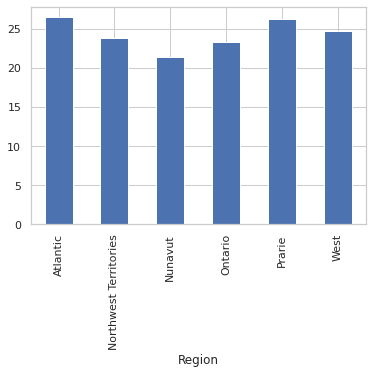

In [29]:
df.groupby('Region')['Order_Quantity'].mean().plot.bar()

###Inference:
#####Earlier we saw that the number of orders from Nunavut were less, however, here it shows that its Order Quantity is comparable with the others.
---



In [30]:
pd.crosstab(df['Ship_Mode'], df['Product_Category'])

Product_Category,Furniture,Office Supplies,Technology
Ship_Mode,,,
Express Air,23,88,40
Regular Air,75,359,145


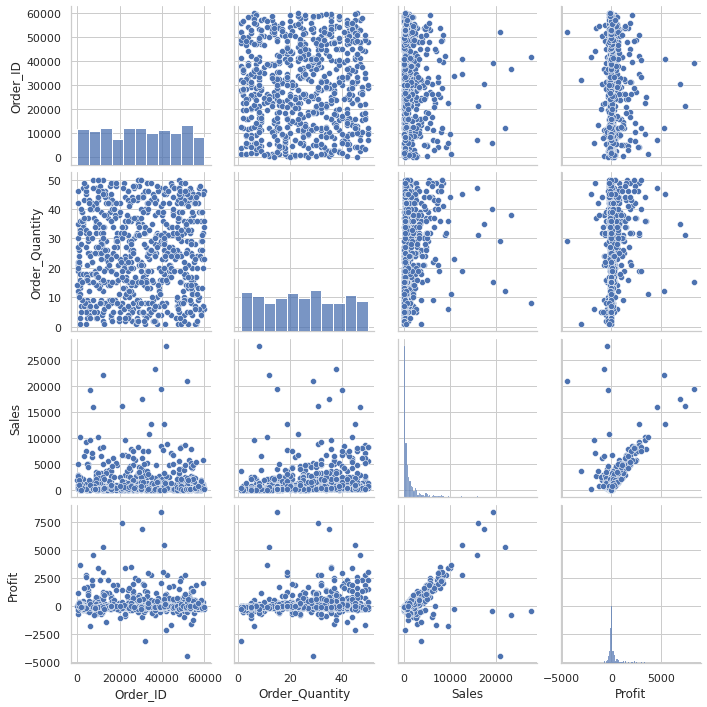

In [31]:
sns.pairplot(df)

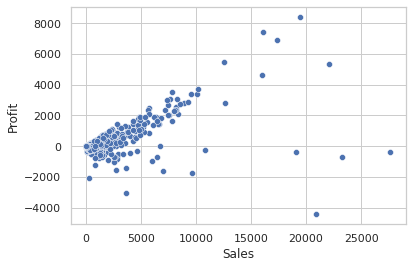

In [32]:
sns.scatterplot(data=df, x="Sales", y="Profit")

###Inference:
#####Most of the sales are small in nature with very few or even negative profits. As the size of the Sale increases, the chances of loss also decrease. Therefore, the Store should consider ways to increases bigger sales.
---



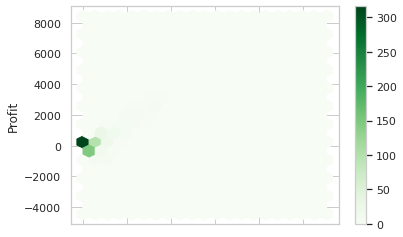

In [33]:
df.plot.hexbin(x='Sales', y='Profit', gridsize = 20, cmap ='Greens' )

###Inference:
#####This Hex Plot represents the above scatter plot in a clearer manner, with the same inferences.
---



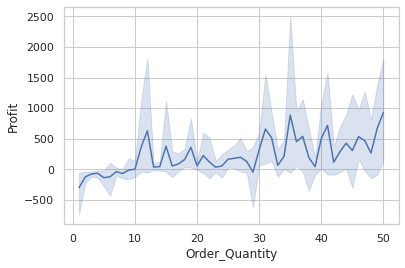

In [34]:
sns.lineplot(data=df, x="Order_Quantity", y="Profit")

###Inference:
#####We observe an increasing trend, i.e., as the Order Quantity increases, the Profit tends to increase along with it.
---



In [35]:
data = df.groupby("Product_Category")["Profit"].sum()
data

Product_Category
Furniture          17017.84
Office Supplies    53073.95
Technology         81368.05
Name: Profit, dtype: float64

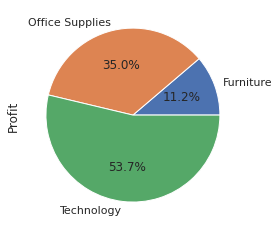

In [36]:
data.plot.pie(autopct="%.1f%%");

###Inference
#####The most profitable Product Category is Technology, and the least profitable is Furniture.
---



([<matplotlib.patches.Wedge at 0x7ff94e4e3a90>,
 [Text(-0.3801735460560083, 1.0322151301347993, 'Office Supplies'),
  Text(-0.07568271001771502, -1.0973933330417014, 'Technology'),
  Text(1.003612195131362, -0.45029164081027473, 'Furniture')],
 [Text(-0.17280615729818558, 0.46918869551581777, '61.2'),
  Text(-0.0344012318262341, -0.4988151513825915, '25.3'),
  Text(0.45618736142334626, -0.20467801855012485, '13.4')])

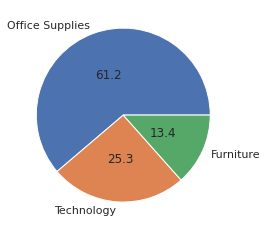

In [37]:
plt.pie(df['Product_Category'].value_counts(), autopct = '%.1f', labels = ['Office Supplies', 'Technology', 'Furniture'], pctdistance=0.5)

###Inference:
#####Even though the technolgy category is the most profitable, it constitutes only 50% of the orders.
---

